# Human Variation and Diesase Coalescent Computer Lab
---

Welcome to the coalescent computer lab! Here we'll explore some fundementals of the coalescent using explortory data analysis (i.e. computing summaray statistics / visulization) and simulation. We'll employ a powerful coalescent simulator called `msprime` which allow us to efficently generate genelogies under a given demography and subsquently sprinkle mutations on these genelogies to generate sequence data. Coalecsent simulation is a very important tool to be equipped with for the modern population geneticist as ...

* It allows us to develop intuition for a simple generative model that could explain patterns in our data
* We can use simulations to compare the accuracy of methods and see where they break down and suceed
* Simulation can be used in inference for instance to obtain monte carlo estimates for particular steps of a complicated model or peform approximate Bayesian inference (ABC)

A quick note about computing: The environment we are in is called a `jupyter notebook`. A `jupyter notebook` is an interactive computational portal that allows us to make documents that combine simple text formats (markdown / latex) and code. This is quite powerful as we can write up analyses and explorations in the notebook and annonate visualizations and code with text and even math (via latex). Jupyter is primary geared for `python` but one can actually change the "kernal" of the notebook to use `R` and even `julia`. Today we'll actually be using a very interesting python package called `rpy2` which allows us to run `R` commands in a `python` kernal. We can even pass objects created in python into an `R` code block. How this works will become more clear as we get started. Alright now lets begin by importing various libraries that we'll be using in this notebook!

## Imports / configuration

Here we load a jupyter extension that allows us to use `rpy2` to pass objects back and forth between `R` and `python` code blocks. 

In [1]:
%load_ext rpy2.ipython

This is how we import packages in python. `numpy` is a python package for creating, manipulating and operating on arrays. Lastly but not least, `msprime` is a python package for performing coalescent simulations! It expands upon Dick Hudson's, a UChicago professor and coalescent pioneer, `ms` software. 

In [102]:
import numpy as np
import msprime 
from IPython.display import SVG

Here is a quick example of how we can pass python objects into `R`. Lets first create a simple matrix $\mathbf{A}$ 

In [13]:
A = np.array([[1,2], [3, 4]])
A

array([[1, 2],
       [3, 4]])

Lets now import $\mathbf{A}$ into `R`. To use `R` use the `%%R` command in the top of the code block ...

In [18]:
%%R -i A
A

     [,1] [,2]
[1,]    1    2
[2,]    3    4


Cool! That seems to work. Lets try making simple plot ...

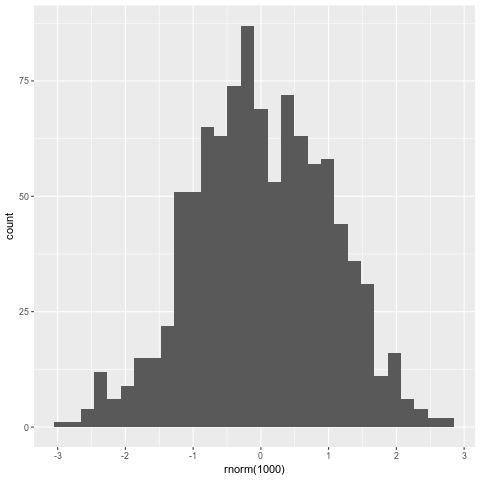

In [21]:
%%R
library(ggplot2)
qplot(rnorm(1000))

We are now equipped to run the rest of the notebook ...

## A "fishy" population genetics mystery

Suppose you are hired as a consultant for the local fisheries agency. They have decided they'd like to track the genetic diversity of the *strange and quite rare* haploid local salmon population to help inform conservation efforts on this important species. They give ***you*** a genomic dataset that was generated from $n=50$ individuals in $r=100$ indepdent non-recombining regions of the salmon genome each of length $\ell=5000$. This dataset is a genotype matrix where the rows are haploid individuals and the columns are different genetic variants 

In [99]:
G = np.load("data/genotype_matrix.npy")
G

array([[0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

---

In `python` or `R` (*your choice*) write three functions that take in `G` as an argument to compute some important summarary statistics ...

* nucleotide diversity $\pi$
* the number of segregating sites $S$
* the site frequency spectrum $(\zeta_1, \zeta_2, \dots, \zeta_n)$ 

In [96]:
%%R -i G
# R code goes here

(50, 9122)

In [ ]:
# python code goes here

Given your estimate of $\pi$ and $S$ compute Tajimas D and plot the SFS. What do these tell you about how the salmon population is doing (specifically the population size)?

In [ ]:
%%R
# R code for computations and plots go here

In [ ]:
# python code for computations and plots go here

---

We'll return to this example shortly ...

## Coalescent simulation using `msprime`

Read and explore up to the "demographic events" in a really nice [jupyter notebook](https://github.com/jhmarcus/spg-chapter/) written by Jerome Keller, the author of `msprime`. Click the launch binder button at the bottom of the page. We strongly encourage to change parameters in the notebook and build intution on how that effects properties of the coalescent. 

## Writing your own coalescent simulations

You made some inference by looking at summaray statistics of the genotype matrix provided by the fisheries agency. But now lets take it a step further and actually write a coalescent simulation that will generate results that match the summary statistics you computed previously. 

---

Adapting code from Jerhomes notebook 

---